In [1]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=6944d3a75c18aa4abdffde3c497d42958a9072bac2fd6715604b8d197896bf8a
  Stored in directory: c:\users\santhosh kumar\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes import Axes
import matplotlib as mpl
from apyori import apriori

In [6]:
sns.set_palette("autumn")

In [7]:
df=pd.read_csv('Market_Basket_Optimisation.csv')

In [8]:
df

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7496,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df=pd.read_csv('Market_Basket_Optimisation.csv',header=None,names=[f"item_{idx}" for idx in range(1, 21)])

In [10]:
df.shape

(7501, 20)

In [11]:
df.isnull().sum()

item_1        0
item_2     1754
item_3     3112
item_4     4156
item_5     4972
item_6     5637
item_7     6132
item_8     6520
item_9     6847
item_10    7106
item_11    7245
item_12    7347
item_13    7414
item_14    7454
item_15    7476
item_16    7493
item_17    7497
item_18    7497
item_19    7498
item_20    7500
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_1   7501 non-null   object
 1   item_2   5747 non-null   object
 2   item_3   4389 non-null   object
 3   item_4   3345 non-null   object
 4   item_5   2529 non-null   object
 5   item_6   1864 non-null   object
 6   item_7   1369 non-null   object
 7   item_8   981 non-null    object
 8   item_9   654 non-null    object
 9   item_10  395 non-null    object
 10  item_11  256 non-null    object
 11  item_12  154 non-null    object
 12  item_13  87 non-null     object
 13  item_14  47 non-null     object
 14  item_15  25 non-null     object
 15  item_16  8 non-null      object
 16  item_17  4 non-null      object
 17  item_18  4 non-null      object
 18  item_19  3 non-null      object
 19  item_20  1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [13]:
df.head()

,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,item_10,item_11,item_12,item_13,item_14,item_15,item_16,item_17,item_18,item_19,item_20
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
ap=df.melt()['value'].dropna().sort_values()

In [16]:
ap

53201     asparagus
41879       almonds
16444       almonds
28148       almonds
29316       almonds
            ...    
54568      zucchini
35183      zucchini
36954      zucchini
62439      zucchini
28412      zucchini
Name: value, Length: 29363, dtype: object

In [19]:
ap[ap.str.contains("^\s|\s$")].to_list()

[' asparagus']

In [21]:
df.replace(" asparagus", "asparagus", inplace=True)
ap.replace(" asparagus", "asparagus", inplace=True)

In [23]:
print(f"There are {ap.nunique()} different products:\n\n", ap.unique())

There are 119 different products:

 ['asparagus' 'almonds' 'antioxydant juice' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green tea' 'muffi

In [24]:
ap.nunique()

119

In [29]:
x=ap.unique()

In [30]:
x

array(['asparagus', 'almonds', 'antioxydant juice', 'avocado',
       'babies food', 'bacon', 'barbecue sauce', 'black tea',
       'blueberries', 'body spray', 'bramble', 'brownies', 'bug spray',
       'burger sauce', 'burgers', 'butter', 'cake', 'candy bars',
       'carrots', 'cauliflower', 'cereals', 'champagne', 'chicken',
       'chili', 'chocolate', 'chocolate bread', 'chutney', 'cider',
       'clothes accessories', 'cookies', 'cooking oil', 'corn',
       'cottage cheese', 'cream', 'dessert wine', 'eggplant', 'eggs',
       'energy bar', 'energy drink', 'escalope', 'extra dark chocolate',
       'flax seed', 'french fries', 'french wine', 'fresh bread',
       'fresh tuna', 'fromage blanc', 'frozen smoothie',
       'frozen vegetables', 'gluten free bar', 'grated cheese',
       'green beans', 'green grapes', 'green tea', 'ground beef', 'gums',
       'ham', 'hand protein bar', 'herb & pepper', 'honey', 'hot dogs',
       'ketchup', 'light cream', 'light mayo', 'low fat yogur

In [132]:
y=ap.value_counts()

In [133]:
nx=pd.DataFrame(y)

In [135]:
nx.head()

,value
mineral water,1788
eggs,1348
spaghetti,1306
french fries,1282
chocolate,1230


Text(0, 0.5, 'No.of transactions')

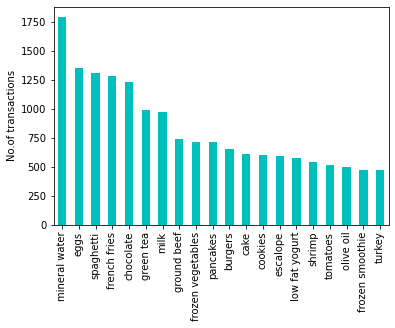

In [42]:
ax=y.nlargest(20).plot(kind='bar',color='c')
ax.set_ylabel("No.of transactions")

In [48]:
bs=df.notna().apply(sum,axis=1)

In [49]:
bs

0       20
1        3
2        1
3        2
4        5
        ..
7496     3
7497     6
7498     1
7499     2
7500     4
Length: 7501, dtype: int64

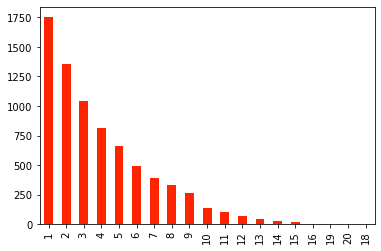

In [50]:
ax=bs.value_counts().plot(kind='bar')

In [51]:
bs.describe()

count    7501.000000
mean        3.914545
std         2.905540
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        20.000000
dtype: float64

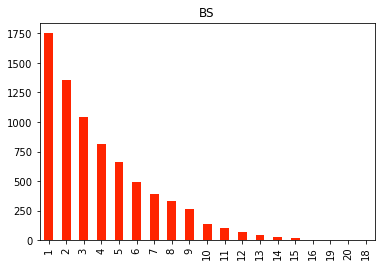

In [137]:
bs=df.notna().apply(sum,axis=1).value_counts().plot(kind='bar',title='BS')

In [54]:
bs

0       20
1        3
2        1
3        2
4        5
        ..
7496     3
7497     6
7498     1
7499     2
7500     4
Length: 7501, dtype: int64

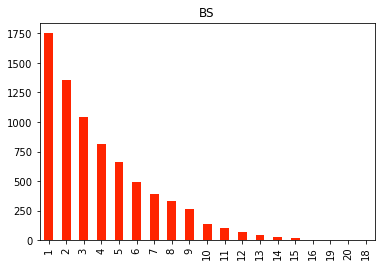

In [63]:
ax=bs.value_counts().plot(kind='bar',title='BS')

In [64]:
absi=bs.mean()

In [65]:
absi

3.914544727369684

In [167]:
i=df[bs>15].dropna()

TypeError: '>' not supported between instances of 'AxesSubplot' and 'int'

In [166]:
p=i.value_counts()

AttributeError: 'int' object has no attribute 'value_counts'

In [138]:
p

item_1  item_2   item_3   item_4          item_5        item_6            item_7  item_8          item_9        item_10       item_11         item_12    item_13  item_14  item_15        item_16  item_17            item_18          item_19  item_20  
shrimp  almonds  avocado  vegetables mix  green grapes  whole weat flour  yams    cottage cheese  energy drink  tomato juice  low fat yogurt  green tea  honey    salad    mineral water  salmon   antioxydant juice  frozen smoothie  spinach  olive oil    1
dtype: int64

In [147]:
dataframe_list=[]
for i in range(1,7501):
    dataframe_list.append([str(df.values[i,j]) for j in range(0,20)])

In [158]:
df.values[0]

array(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'], dtype=object)

In [148]:
dataframe_list

[['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['low fat yogurt',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['whole wheat pasta',
  

In [125]:
assocrul=apriori(dataframe_list,min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)

In [126]:
ar=list(assocrul)

In [127]:
ax=pd.DataFrame(ar)

In [129]:
ax

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982906..."
1,"(escalope, mushroom cream sauce)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(escalope, pasta)",0.005867,"[((pasta), (escalope), 0.37288135593220345, 4...."
3,"(ground beef, herb & pepper)",0.016000,"[((herb & pepper), (ground beef), 0.3234501347..."
4,"(tomato sauce, ground beef)",0.005333,"[((tomato sauce), (ground beef), 0.37735849056..."
5,"(whole wheat pasta, olive oil)",0.008000,"[((whole wheat pasta), (olive oil), 0.27149321..."
6,"(pasta, shrimp)",0.005067,"[((pasta), (shrimp), 0.3220338983050848, 4.514..."
7,"(light cream, chicken, nan)",0.004533,"[((light cream), (chicken, nan), 0.29059829059..."
8,"(chocolate, frozen vegetables, shrimp)",0.005333,"[((chocolate, frozen vegetables), (shrimp), 0...."
9,"(cooking oil, spaghetti, ground beef)",0.004800,"[((cooking oil, ground beef), (spaghetti), 0.5..."


In [128]:
for item in ar:
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))

Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: escalope -> mushroom cream sauce
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: escalope -> pasta
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: tomato sauce -> ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: whole wheat pasta -> olive oil
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: pasta -> shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: light cream -> chicken
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: chocolate -> frozen vegetables
Support: 0.005333333333333333
Confidence: 0.232558139534883

In [181]:
dfl=[]
for i in range(0,len(df)):
    dfl.append([str(df.values[i,j]) for j in range(20)])

In [182]:
len(df)

7501

In [183]:
dfl

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [184]:
axi=apriori(dfl,min_support=0.0045,min_confidence=0.2,min_lift=3,min_length=2)

In [185]:
type(axi)

generator

In [186]:
axl=list(axi)

In [187]:
axl

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'ground beef', 'herb & pepper'}), support=0.015997866951073192, ordered_statistics=[OrderedStatistic(items_base=frozenset({'herb & pepper'}), items_add=frozenset({'ground beef'}), 

In [188]:
axldf=pd.DataFrame(axl)

In [189]:
axldf

,items,support,ordered_statistics
0,"(light cream, chicken)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(escalope, mushroom cream sauce)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(escalope, pasta)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(ground beef, herb & pepper)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
4,"(tomato sauce, ground beef)",0.005333,"[((tomato sauce), (ground beef), 0.37735849056..."
5,"(whole wheat pasta, olive oil)",0.007999,"[((whole wheat pasta), (olive oil), 0.27149321..."
6,"(pasta, shrimp)",0.005066,"[((pasta), (shrimp), 0.3220338983050847, 4.506..."
7,"(light cream, chicken, nan)",0.004533,"[((light cream), (chicken, nan), 0.29059829059..."
8,"(chocolate, frozen vegetables, shrimp)",0.005333,"[((chocolate, frozen vegetables), (shrimp), 0...."
9,"(cooking oil, spaghetti, ground beef)",0.004799,"[((cooking oil, ground beef), (spaghetti), 0.5..."


In [207]:
for item in axl:
    pair=item[0]
    at=[]
    for x in pair:
        at.append(x)
    print("Rule: "+at[1]+"->"+at[0])
    print("Support: ",item[1])
    print("Confidence: ",str(item[2][0][2]))
    print("Lift: ",item[2][0][3])

Rule: chicken->light cream
Support:  0.004532728969470737
Confidence:  0.29059829059829057
Lift:  4.84395061728395
Rule: mushroom cream sauce->escalope
Support:  0.005732568990801226
Confidence:  0.3006993006993007
Lift:  3.790832696715049
Rule: pasta->escalope
Support:  0.005865884548726837
Confidence:  0.3728813559322034
Lift:  4.700811850163794
Rule: herb & pepper->ground beef
Support:  0.015997866951073192
Confidence:  0.3234501347708895
Lift:  3.2919938411349285
Rule: ground beef->tomato sauce
Support:  0.005332622317024397
Confidence:  0.3773584905660377
Lift:  3.840659481324083
Rule: olive oil->whole wheat pasta
Support:  0.007998933475536596
Confidence:  0.2714932126696833
Lift:  4.122410097642296
Rule: shrimp->pasta
Support:  0.005065991201173177
Confidence:  0.3220338983050847
Lift:  4.506672147735896
Rule: chicken->light cream
Support:  0.004532728969470737
Confidence:  0.29059829059829057
Lift:  4.84395061728395
Rule: frozen vegetables->chocolate
Support:  0.005332622317024

In [190]:
item=axl[0]
pair=item[0]
items=[x for x in pair]

In [191]:
items

['light cream', 'chicken']

In [193]:
pair

frozenset({'chicken', 'light cream'})

In [219]:
rule=[]
lift=[]
conf=[]
supp=[]
for item in axl:
    pair=item[0]
    items=[x for x in pair]
    rule.append(items)
    supp.append(str(item[1]))
    lift.append(str(item[2][0][3]))
    conf.append(str(item[2][0][2]))

In [220]:
len(rule)

48

In [221]:
len(supp)

48

In [222]:
len(lift)

48

In [223]:
len(conf)

48

In [225]:
dfd= {'Rule': rule, 'Support': supp, 'Confidence': conf, "Lift": lift}
d = pd.DataFrame(dfd)

In [226]:
d

,Rule,Support,Confidence,Lift
0,"[light cream, chicken]",0.004532728969470737,0.29059829059829057,4.84395061728395
1,"[escalope, mushroom cream sauce]",0.005732568990801226,0.3006993006993007,3.790832696715049
2,"[escalope, pasta]",0.005865884548726837,0.3728813559322034,4.700811850163794
3,"[ground beef, herb & pepper]",0.015997866951073192,0.3234501347708895,3.2919938411349285
4,"[tomato sauce, ground beef]",0.005332622317024397,0.3773584905660377,3.840659481324083
5,"[whole wheat pasta, olive oil]",0.007998933475536596,0.2714932126696833,4.122410097642296
6,"[pasta, shrimp]",0.005065991201173177,0.3220338983050847,4.506672147735896
7,"[light cream, chicken, nan]",0.004532728969470737,0.29059829059829057,4.84395061728395
8,"[chocolate, frozen vegetables, shrimp]",0.005332622317024397,0.23255813953488375,3.2545123221103784
9,"[cooking oil, spaghetti, ground beef]",0.004799360085321957,0.5714285714285714,3.2819951870487856
